# Charts

### This script contains the following points: 

1. Exercise 4.9 Charts
        a. Bar Chart
        b. Histogram
        c. Scatterplot
        d. Sampling
        e. Line Chart
2. Sales Findings
3. Customer Loyalty Bar Chart
4. Line Charts
5. Age and spending power (income)
6. Exporting Visualizations 
7. Exporting Dataset

In [1]:
# Importing Libraries 

import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/tsique/Documents/Instacart Basket Analysis'

In [3]:
# Importing ords_prods_cust_2.pkl 

ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_pt1.pkl'))

## 01. Exercise 4.9 Charts

### a. Bar Chart

<AxesSubplot:>

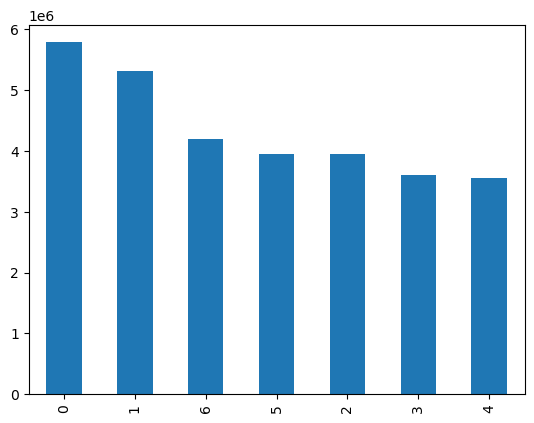

In [4]:
# Create a bar chart 

ords_prods_cust['orders_day_of_week'].value_counts().plot.bar()

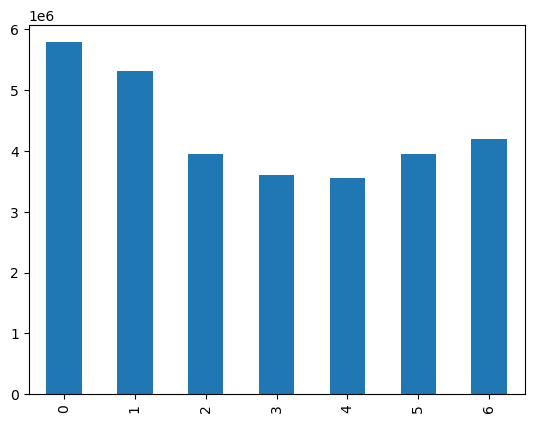

In [5]:
# Creating bar charts in numerical order

bar_ords_week = ords_prods_cust['orders_day_of_week'].value_counts().sort_index().plot.bar()

([<matplotlib.axis.XTick at 0x7fbb0a3aec40>,
 [Text(0, 0, 'Sat'),
  Text(1, 0, 'Sun'),
  Text(2, 0, 'Mon'),
  Text(3, 0, 'Tues'),
  Text(4, 0, 'Wed'),
  Text(5, 0, 'Thurs'),
  Text(6, 0, 'Fri')])

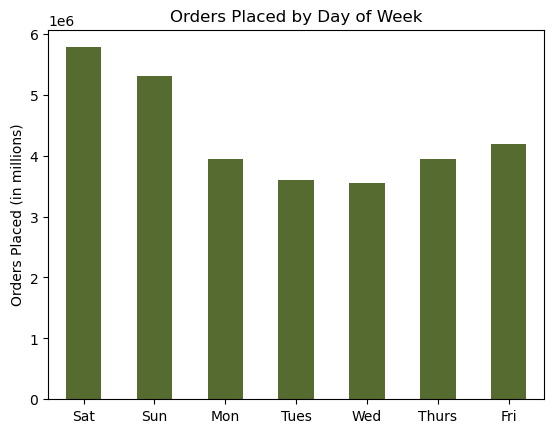

In [6]:
# Creating bar chart of orders day of week with label

bar_ords_week = ords_prods_cust['orders_day_of_week'].value_counts().sort_index().plot.bar(rot = 0, color= ['#556B2F'])

# Add title and axis name

plt.ylabel('Orders Placed (in millions)')
plt.title('Orders Placed by Day of Week')
plt.xticks([0,1,2,3,4,5,6], ['Sat', 'Sun','Mon', 'Tues', 'Wed', 'Thurs', 'Fri'])

### b. Histograms

Text(0.5, 1.0, 'Frequency of Products Purchased by Price')

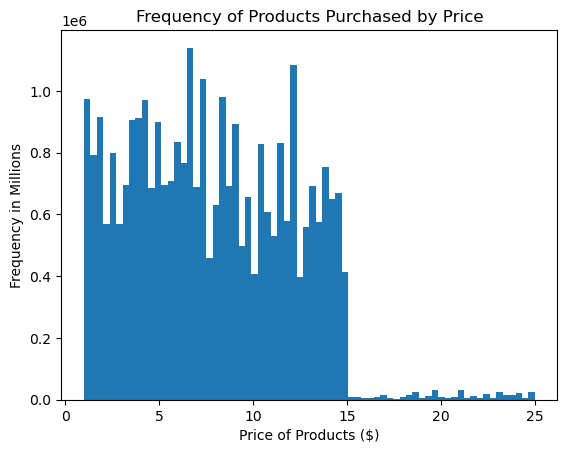

In [7]:
# Creating Histogram

hist_prices = ords_prods_cust['prices'].plot.hist(bins = 70)

# Adding title and axis name

plt.xlabel('Price of Products ($)')
plt.ylabel('Frequency in Millions')
plt.title('Frequency of Products Purchased by Price')

### c. Scatterplot

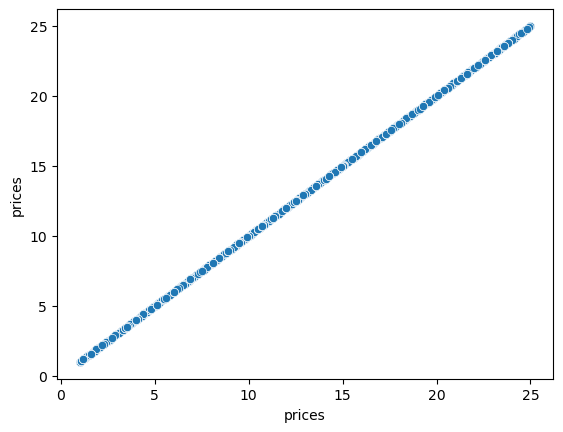

In [8]:
# Creating Scatterplot

scatter_prices = sns.scatterplot (x = 'prices', y = 'prices', data = ords_prods_cust)

### d. Sampling

In [9]:
# Creating sample

np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [10]:
# Checking output 

dev

array([False,  True, False, ...,  True, False,  True])

In [11]:
# Checking first ten numbers

np.random.rand(10)

array([0.38249654, 0.86075523, 0.52050071, 0.76980339, 0.95770057,
       0.65565091, 0.77542577, 0.2051172 , 0.66590939, 0.42935793])

In [12]:
# Create a list holding True or False values to test np.random.rand() <= 0.7

dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [13]:
# Store 70% of sample in the dataframe big

big = ords_prods_cust[dev]

In [14]:
# Store 30% of sample in the dataframe small

small = ords_prods_cust[~dev]

In [15]:
# Checking numbers of rows

len(ords_prods_cust)

30328763

In [16]:
# Verifying number of rows

len(big) + len(small)

30328763

In [17]:
# Creating a subset dataframe for line chart

df_2 = small[['orders_day_of_week', 'prices']]

### e. Line chart

([<matplotlib.axis.XTick at 0x7fba7b426f70>,
 [Text(0, 0, 'Sat'),
  Text(1, 0, 'Sun'),
  Text(2, 0, 'Mon'),
  Text(3, 0, 'Tues'),
  Text(4, 0, 'Wed'),
  Text(5, 0, 'Thurs'),
  Text(6, 0, 'Fri')])

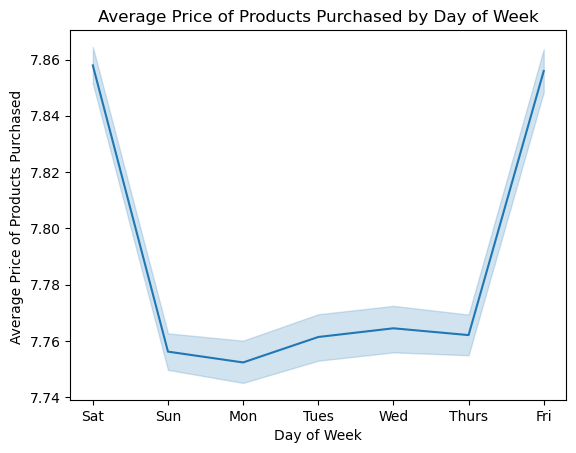

In [18]:
# Creating Line Chart

line_day_prices = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

# Adding title and axis names 

plt.title('Average Price of Products Purchased by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Price of Products Purchased ')
plt.xticks([0,1,2,3,4,5,6], ['Sat', 'Sun','Mon', 'Tues', 'Wed', 'Thurs', 'Fri'])

## 02. Sales Findings

Text(0, 0.5, 'Frequency of Orders')

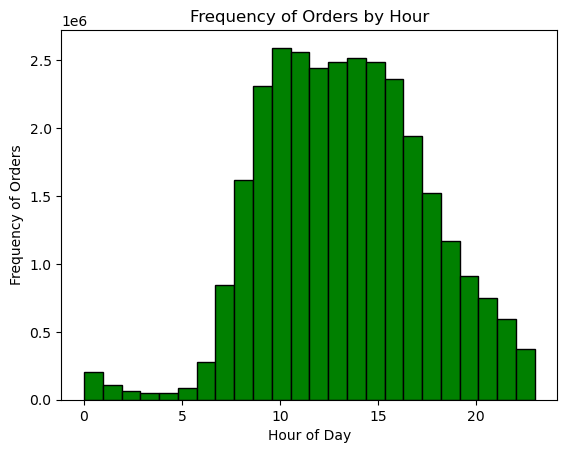

In [19]:
# Creating Histogram 

hist_hour = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24, edgecolor = 'black', color = ['green'])

# Adding title and axis names 

plt.title('Frequency of Orders by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency of Orders')

The histograms demonstrates the frequency of orders by hour. 

## 03. Customer Loyalty Bar Chart

Text(0, 0.5, 'Number of Customers (in millions)')

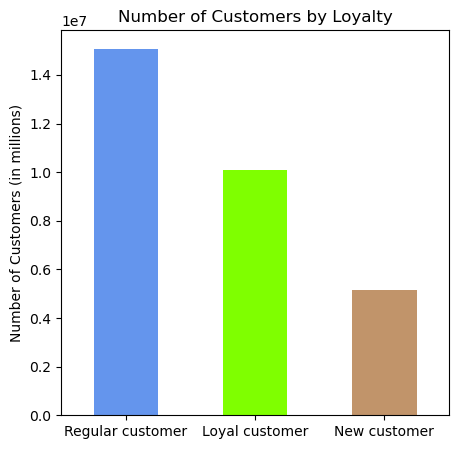

In [20]:
# Creating bar chart on customer loyalty 

cust_loyalty = ords_prods_cust['loyalty_flag'].value_counts().plot.bar(rot = 0, figsize = (5, 5), color = ['#6495ed', '#7fff00', '#c1946a'])

# Adding title and axis names 

plt.title('Number of Customers by Loyalty')
plt.ylabel('Number of Customers (in millions)')

## 04. Line Charts

### Hour of day and prices

In [21]:
# Creating a subset dataframe 

df_hour = small[['order_hour_of_day', 'prices']]

Text(0, 0.5, 'Average Price of Products Purchased')

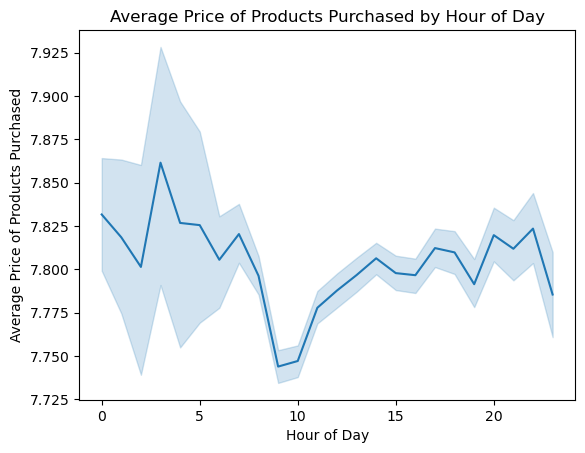

In [22]:
# Creating Line chart for average prices of products by hour of day 

line_price_hour = sns.lineplot(data = df_hour, x = 'order_hour_of_day', y = 'prices')

# Adding title and axis names 

plt.title('Average Price of Products Purchased by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Price of Products Purchased')

### Customer age and dependents

In [23]:
# Checking first 5 rows 

ords_prods_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_orders,order_frequency_flag,gender,state,age,number_dependents,fam_status,income,_merge
0,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both
1,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both
2,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both
3,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both
4,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,both


In [24]:
# Creating subset for age and number of dependents

df_age = small [['age', 'number_dependents']]

Text(0, 0.5, 'Number of Dependents')

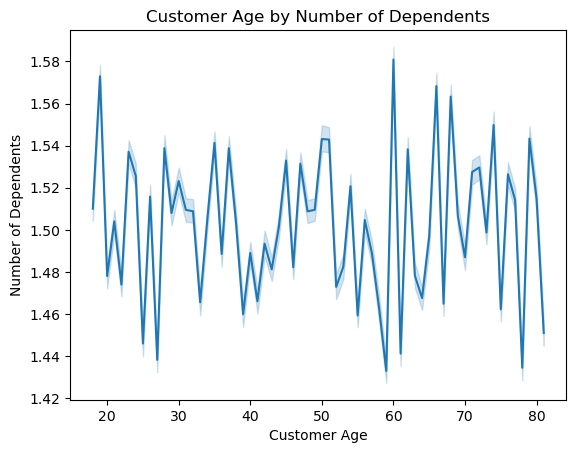

In [25]:
# Creating line chart for age of customer and number of dependents 

line_age_dependents = sns.lineplot(data = df_age, x = 'age', y = 'number_dependents')

# Adding title and axis names 

plt.title('Customer Age by Number of Dependents')
plt.xlabel('Customer Age')
plt.ylabel('Number of Dependents')

The above line chart shows the number of dependents the customer has based on their age. 

## 05. Age and spending power (income)

Text(0, 0.5, 'Customer Income')

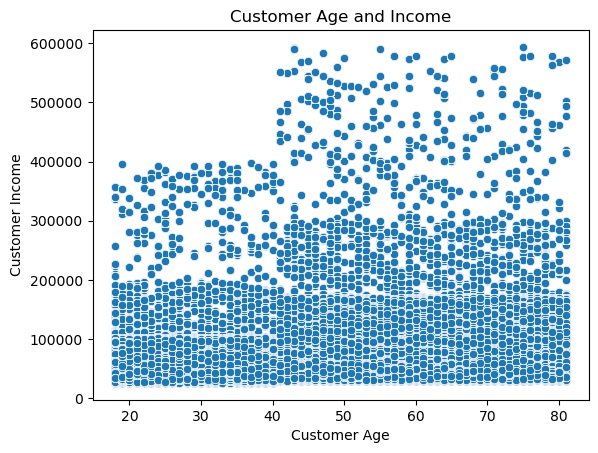

In [26]:
# Creating scattplot on age and income

scatter_age_income = sns.scatterplot(x = 'age', y = 'income', data = ords_prods_cust)

# Adding title and axis names 

plt.title('Customer Age and Income')
plt.xlabel('Customer Age')
plt.ylabel('Customer Income')

The above scatterplot shows income based on the customer's age which has no correltation.

## 06. Exporting Visualizations

In [27]:
bar_ords_week.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_placed_dow.png'))

In [28]:
hist_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prods_price.png'))

In [29]:
scatter_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_prices.png'))

In [30]:
line_day_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'avg_price_day.png'))

In [31]:
hist_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'freq_orders.png'))

In [32]:
cust_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_cust.png'))

In [33]:
line_price_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'avg_price_hour.png'))

In [34]:
line_age_dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_numb_dependents.png'))

In [35]:
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_income.png'))

## 07. Exporting Dataset

In [36]:
ords_prods_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_pt2.pkl'))